In [24]:
import torch
import pickle
import evaluate
with open("/home/od/Desktop/repos/dfd-clip/logs/test/2s(mode1):c23+resi+tune+dbal+5e-5+2s20f+reg_vanilla(f,s,pfa)+rank(1.5)/stats_0515T1459_best.pickle", "rb") as f:
    x = pickle.load(f)
x.keys()

dict_keys(['FFPP', 'DFDC', 'CDF'])

In [25]:
acc = evaluate.load("accuracy")
roc = evaluate.load("roc_auc")

In [30]:
for k in x.keys():
    print(k)
    print(acc.compute(predictions=[
          1 if i > 0.5 else 0 for i in x[k]["prob"]], references=x[k]["label"]))
    print(roc.compute(prediction_scores=x[k]
          ["prob"], references=x[k]["label"]))

FFPP
{'accuracy': 0.5892857142857143}
{'roc_auc': 0.7229081632653063}
DFDC
{'accuracy': 0.6677067082683308}
{'roc_auc': 0.7812783996561761}
CDF
{'accuracy': 0.5658914728682171}
{'roc_auc': 0.8504344919786097}


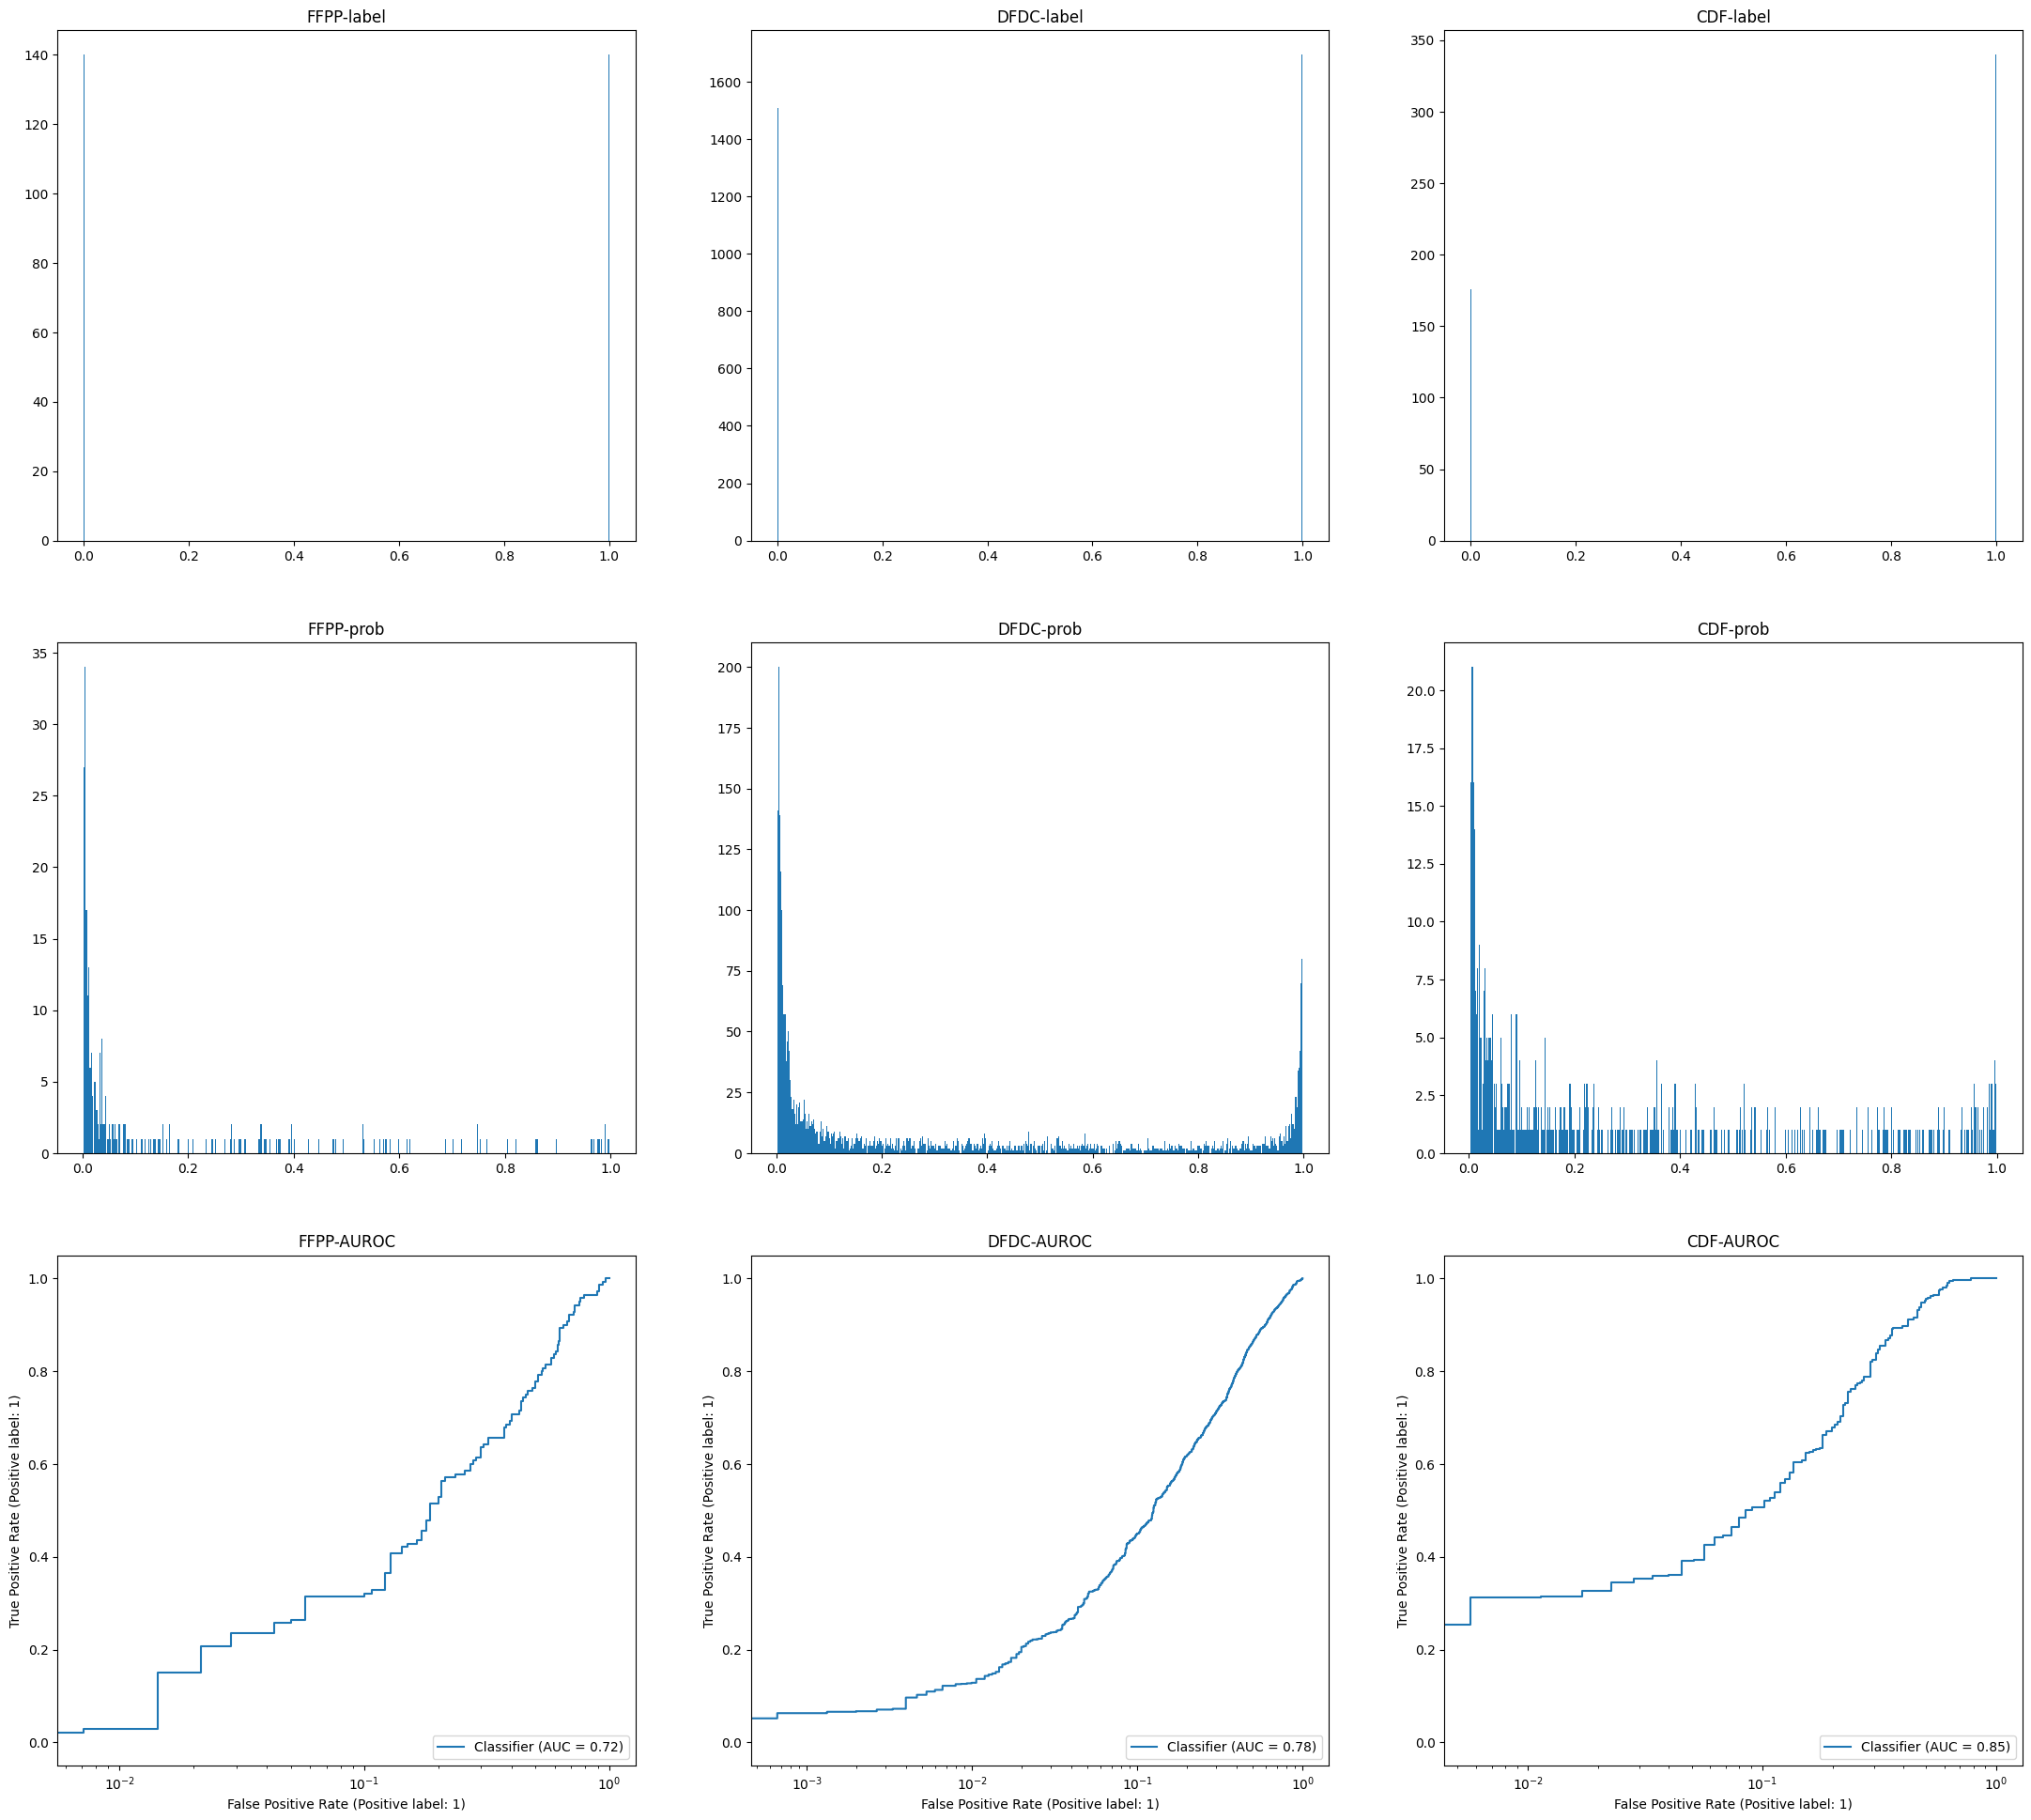

In [32]:
from matplotlib import pyplot as plt
from sklearn import metrics
ds_names = list(x.keys())
m_names = list(x[ds_names[0]].keys())
plt.figure(figsize=(9*len(ds_names), 8*(len(m_names)+1)))
for i, k in enumerate(ds_names):
    # plot stats
    for j, m in enumerate(m_names):
        plt.subplot(len(m_names)+1, len(ds_names), 1+len(ds_names)*j + i)
        # plt.gca().set_xscale("log")
        plt.hist(x[k][m], bins=500)
        plt.title(f"{k}-{m}")
    # plot auroc
    plt.subplot(len(m_names)+1, len(ds_names),
                1+len(ds_names)*len(m_names) + i)
    plt.gca().set_xscale("log")
    metrics.RocCurveDisplay.from_predictions(
        y_true=x[k]["label"], y_pred=x[k]["prob"], ax=plt.gca())
    plt.title(f"{k}-AUROC")
plt.show()